# 데이터 로드

In [23]:
import pandas as pd
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터 로드
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# 데이터 확인

In [24]:
# 특성 이름 설정
feature_names = [
    "CRIM",   # per capita crime rate by town
    "ZN",     # proportion of residential land zoned for lots over 25,000 sq. ft.
    "INDUS",  # proportion of non-retail business acres per town
    "CHAS",   # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    "NOX",    # nitric oxides concentration (parts per 10 million)
    "RM",     # average number of rooms per dwelling
    "AGE",    # proportion of owner-occupied units built prior to 1940
    "DIS",    # weighted distances to five Boston employment centres
    "RAD",    # index of accessibility to radial highways
    "TAX",    # full-value property-tax rate per $10,000
    "PTRATIO",# pupil-teacher ratio by town
    "B",      # 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town
    "LSTAT"   # % lower status of the population
]

# 훈련 데이터와 테스트 데이터를 DataFrame으로 변환
train_df = pd.DataFrame(x_train, columns=feature_names)
train_df['MEDV'] = y_train  # 타겟 값 추가

test_df = pd.DataFrame(x_test, columns=feature_names)
test_df['MEDV'] = y_test  # 타겟 값 추가

In [25]:
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [26]:
# check for missing values in all the columns
train_df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


<ipython-input-27-fee9c25d2adf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['MEDV'], bins=30)


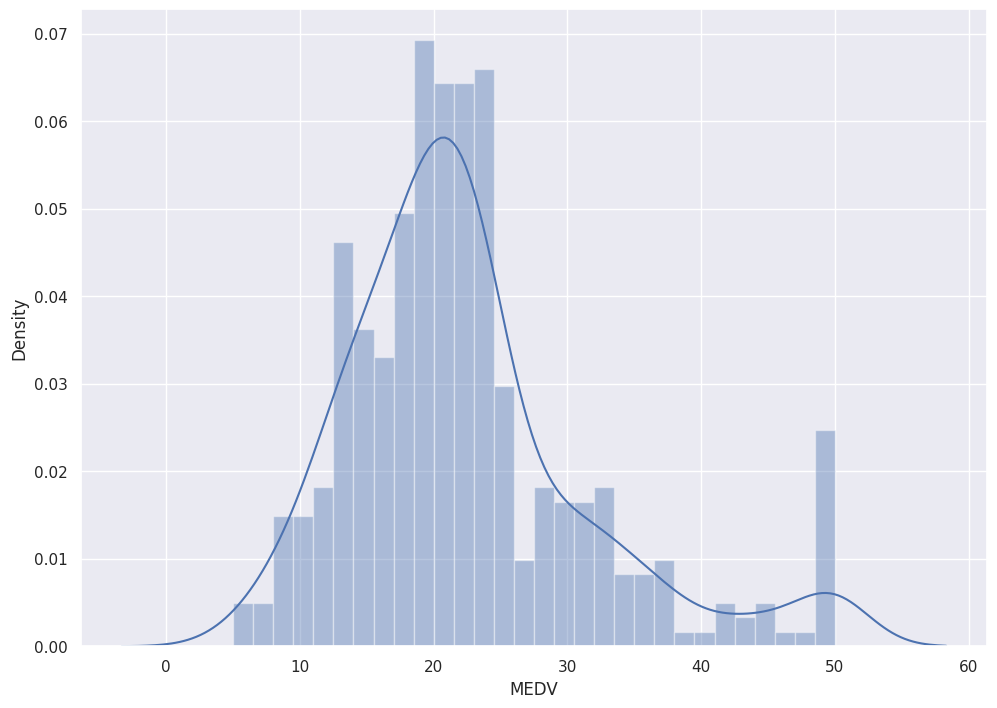

In [27]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(train_df['MEDV'], bins=30)
plt.show()

In [28]:
# compute the pair wise correlation for all columns
correlation_matrix = train_df.corr().round(2)

<Axes: >

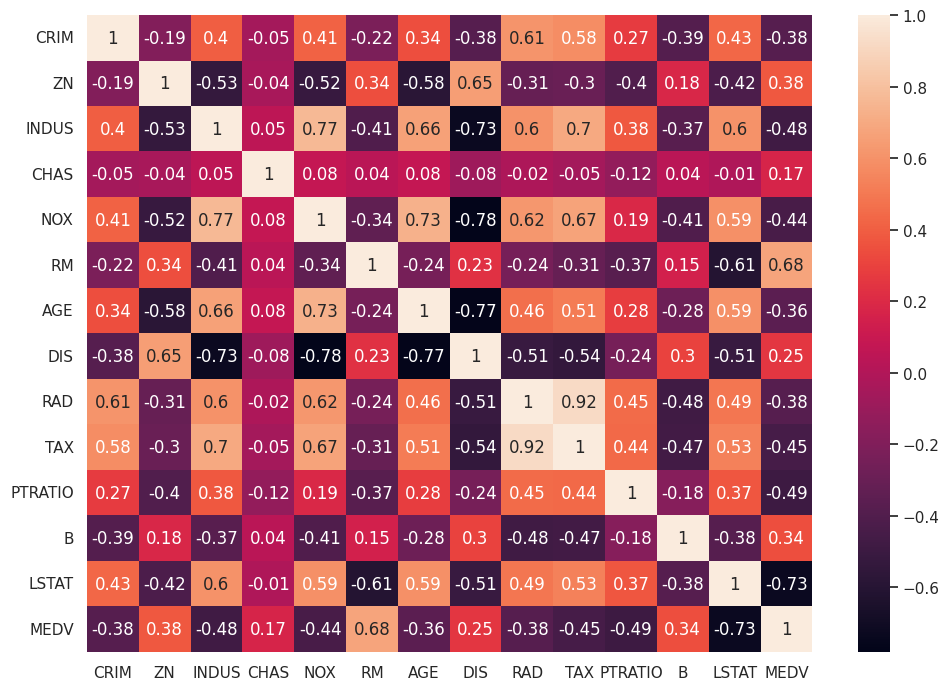

In [29]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

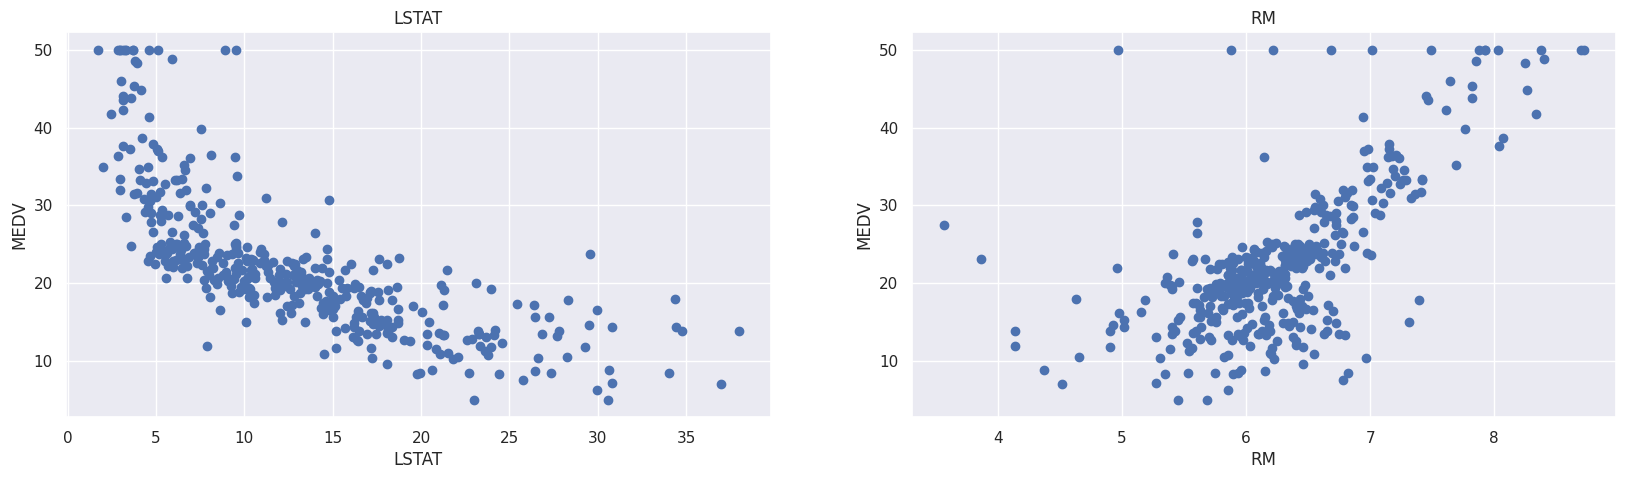

In [30]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = train_df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = train_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Linear Regression 모델 생성

In [31]:
# 독립 변수(X)와 종속 변수(y) 분리
X_train = train_df[feature_names]
y_train = train_df['MEDV']
X_test = test_df[feature_names]
y_test = test_df['MEDV']

In [32]:
# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 모델 평가

In [33]:
# 훈련 데이터 예측
y_train_pred = model.predict(X_train)

# 평가
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# 예측
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# 모델 계수 출력
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coefficients)


Mean Squared Error (MSE): 22.00480083834814
R-squared (R2): 0.7399643695249463
Mean Squared Error (MSE): 23.195599256422994
R-squared (R2): 0.7213535934621551

Model Coefficients:
    Feature  Coefficient
0      CRIM    -0.119998
1        ZN     0.057000
2     INDUS     0.003984
3      CHAS     4.126982
4       NOX   -20.500296
5        RM     3.380249
6       AGE     0.007568
7       DIS    -1.711898
8       RAD     0.334748
9       TAX    -0.011780
10  PTRATIO    -0.902318
11        B     0.008719
12    LSTAT    -0.555843


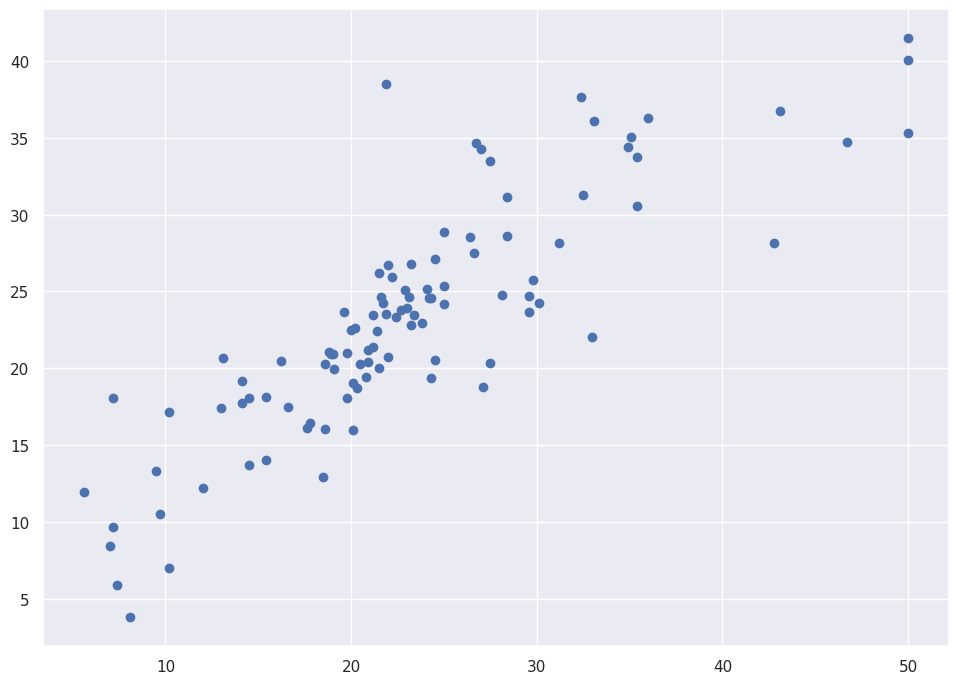

In [34]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_pred)
plt.show()